In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [14]:
f_dump_sizes = "./data/midasDump_run26656_00076.txt"
file = open(f_dump_sizes,"r")
calos = []
sizes = []
isBadFill = []
previousCalo = -1

for line in file:
    data = line.split(" ")
    #print(data)
    calo = int(data[4][3:-2])
    size = int(data[6][:-1])
    if( previousCalo != calo - 1 and calo != 1 ):
        isBadFilli = True
    else:
        isBadFilli = False
    previousCalo = calo
    #if(isBadFilli):
    #    print(calo, size, isBadFilli)
    calos.append(calo)
    sizes.append(size)
    isBadFill.append(isBadFilli)
    
file.close()

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='./data/midasDump_run26656_00076.txt' mode='r' encoding='UTF-8'>
  


In [15]:
df = pandas.DataFrame(list(zip(calos,sizes,isBadFill)), columns=["calo", "size", "badFill"])

In [16]:
df.head()

,calo,size,badFill
0,21,532764,True
1,18,429368,True
2,1,529492,False
3,2,615512,False
4,3,539396,False


In [18]:
df.describe()

,calo,size
count,155.000000,155.000000
mean,12.838710,554103.406452
std,7.068757,107702.380761
min,1.000000,349388.000000
25%,7.000000,482346.000000
50%,13.000000,560860.000000
75%,19.000000,613364.000000
max,24.000000,957664.000000


In [34]:
df.loc[df['badFill'] == True].describe()

,calo,size
count,11.000000,11.000000
mean,17.272727,608953.090909
std,7.497878,163426.247773
min,3.000000,429368.000000
25%,13.000000,525904.000000
50%,21.000000,569052.000000
75%,23.000000,599708.000000
max,24.000000,957664.000000


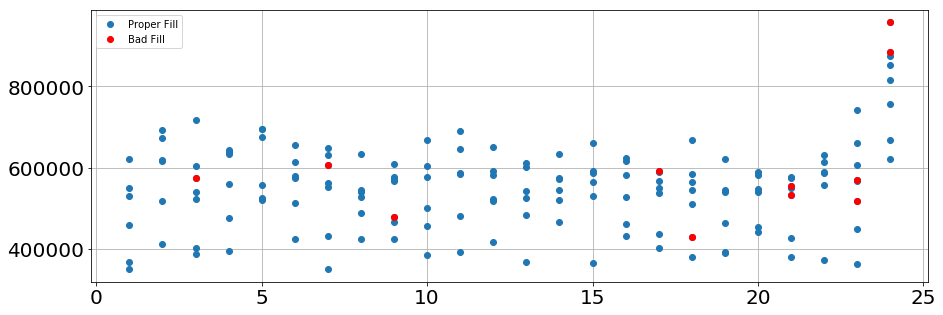

In [39]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df["calo"], df["size"],"o", label="Proper Fill")
plt.plot(df.loc[df['badFill'] == True]["calo"], df.loc[df['badFill'] == True]["size"],"ro",label="Bad Fill")
plt.legend()
plt.grid()
plt.show()

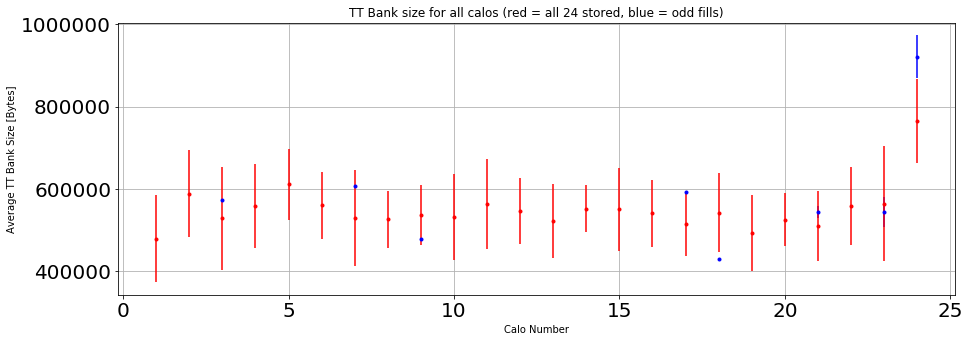

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
answers = [("b.",True), ("r.", False)]
for (fmt, ans) in answers:
    dfi = df.loc[df['badFill'] == ans]
    for i in range(1,25):
        plt.errorbar([i], [ dfi["size"].loc[dfi['calo'] == i].mean() ], yerr=[ dfi["size"].loc[dfi['calo'] == i].std() ] , fmt=fmt)
plt.title("TT Bank size for all calos (red = all 24 stored, blue = odd fills)")
plt.xlabel("Calo Number")
plt.ylabel("Average TT Bank Size [Bytes]")
plt.grid()
plt.show()